# Лабораторна робота №6
## Мета роботи: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.

#### Виконала студентка ФБ-23 Присєвок Оксана

In [1]:
import matplotlib.pyplot as plt
import numpy as np

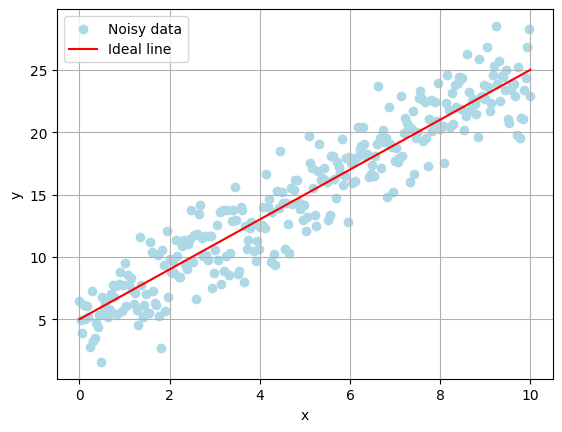

In [2]:
k = 2
b = 5
N = 300
x = np.linspace(0, 10, N)
noise = np.random.normal(0, 2, N)
y = k * x + b + noise

plt.scatter(x, y, label='Noisy data', color = 'lightblue')
plt.plot (x, k*x + b, label='Ideal line', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

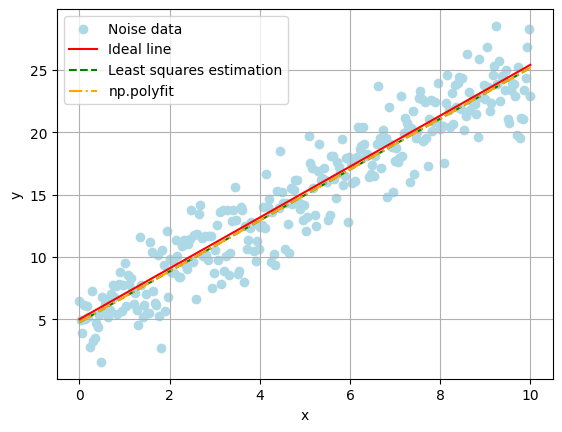

Ideal line params: k=2, b=5 

Least squares estimation: 
 Estimated slope = 2.04010 
 Estimated y-intercept = 4.75548

np.polyfit estimation: 
 Polyfit estimated slope = 2.04010 
 Polyfit estimated y-intercept = 4.75548


In [3]:
def least_squares_method(x, y):
    n=len(x)
    sum_x=np.sum(x)
    sum_y=np.sum(y)
    sum_xy=np.sum(x*y)
    sum_xx=np.sum(x*x)

    kk = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    bb = (sum_y - kk * sum_x) / n
    return kk, bb

kk, bb = least_squares_method(x, y)
coefficients = np.polyfit (x, y, 1)
k_polyfit = coefficients[0]
b_polyfit = coefficients[1]

plt.scatter(x, y, label='Noise data', color='lightblue')
plt.plot(x, kk*x + b, label='Ideal line', color='red')
plt.plot(x, kk*x + bb, label='Least squares estimation', color='green', linestyle='--')
plt.plot(x, k_polyfit * x + b_polyfit, label='np.polyfit', color='orange', linestyle='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Ideal line params: k={k}, b={b} \n")
print(f"Least squares estimation: \n Estimated slope = {kk:.5f} \n Estimated y-intercept = {bb:.5f}\n")
print(f"np.polyfit estimation: \n Polyfit estimated slope = {k_polyfit:.5f} \n Polyfit estimated y-intercept = {b_polyfit:.5f}")

#### Завдання 2. Реалізація методу градієнтного спуску

2.044859092277135 4.723932870942121


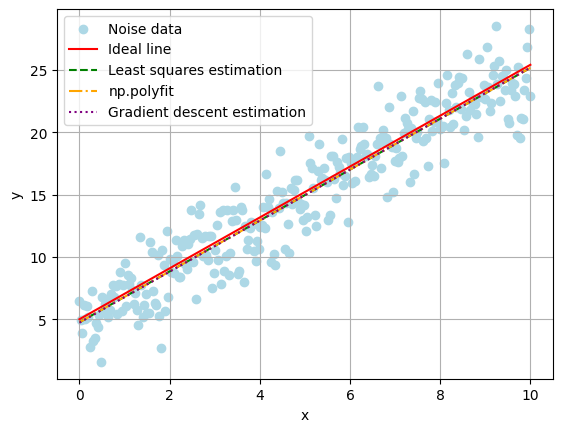

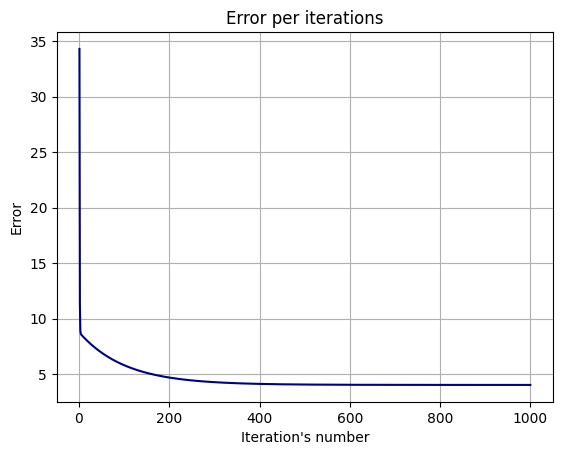

In [4]:
def gradient_descent(x, y, learning_rate, n_iter):
    kk = 0
    bb = 0
    n = len(x)

    for _ in range (n_iter):
        y_pred = kk*x + bb
        kk_g = (-2/n) * np.sum(x * (y - y_pred))
        bb_g = (-2/n) * np.sum(y - y_pred)

        kk -= learning_rate * kk_g
        bb -= learning_rate * bb_g

    return kk, bb

learning_rate = 0.01
n_iter = 1000

kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, n_iter)
print(kk_gradient, bb_gradient)

plt.scatter(x, y, label='Noise data', color='lightblue')
plt.plot(x, kk*x + b, label='Ideal line', color='red')
plt.plot(x, kk*x + bb, label='Least squares estimation', color='green', linestyle='--')
plt.plot(x, k_polyfit * x + b_polyfit, label='np.polyfit', color='orange', linestyle='-.')
plt.plot(x, kk_gradient * x + bb_gradient, label='Gradient descent estimation', color='purple', linestyle=':')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

def loss_calculation(x, y, kk, bb):
    y_pred = kk*x + bb
    return np.mean((y_pred - y) ** 2)

errors = []
iterations = range (1, n_iter + 1)
for i in iterations:
    kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, i)
    error = loss_calculation(x, y, kk_gradient, bb_gradient)
    errors.append(error)

plt.plot(iterations, errors, color='navy')
plt.xlabel('Iteration\'s number')
plt.ylabel('Error')
plt.title('Error per iterations')
plt.grid(True)
plt.show()